
## Proposed Solution for Estimating Life Expectency : Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Life Expectancy Data.csv")
df.columns = df.columns.str.strip()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
1,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762.0,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
2,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486.0,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
3,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798.0,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
4,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466.0,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8


## Median Imputation to handle missing values

In [2]:
df.fillna(df.median(numeric_only=True), inplace=True)

## Label encoding to convert categorical data into a numerical format

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in ["Country", "Status"]:
    df[column] = encoder.fit_transform(df[column])

## Plotting Correlation matrix

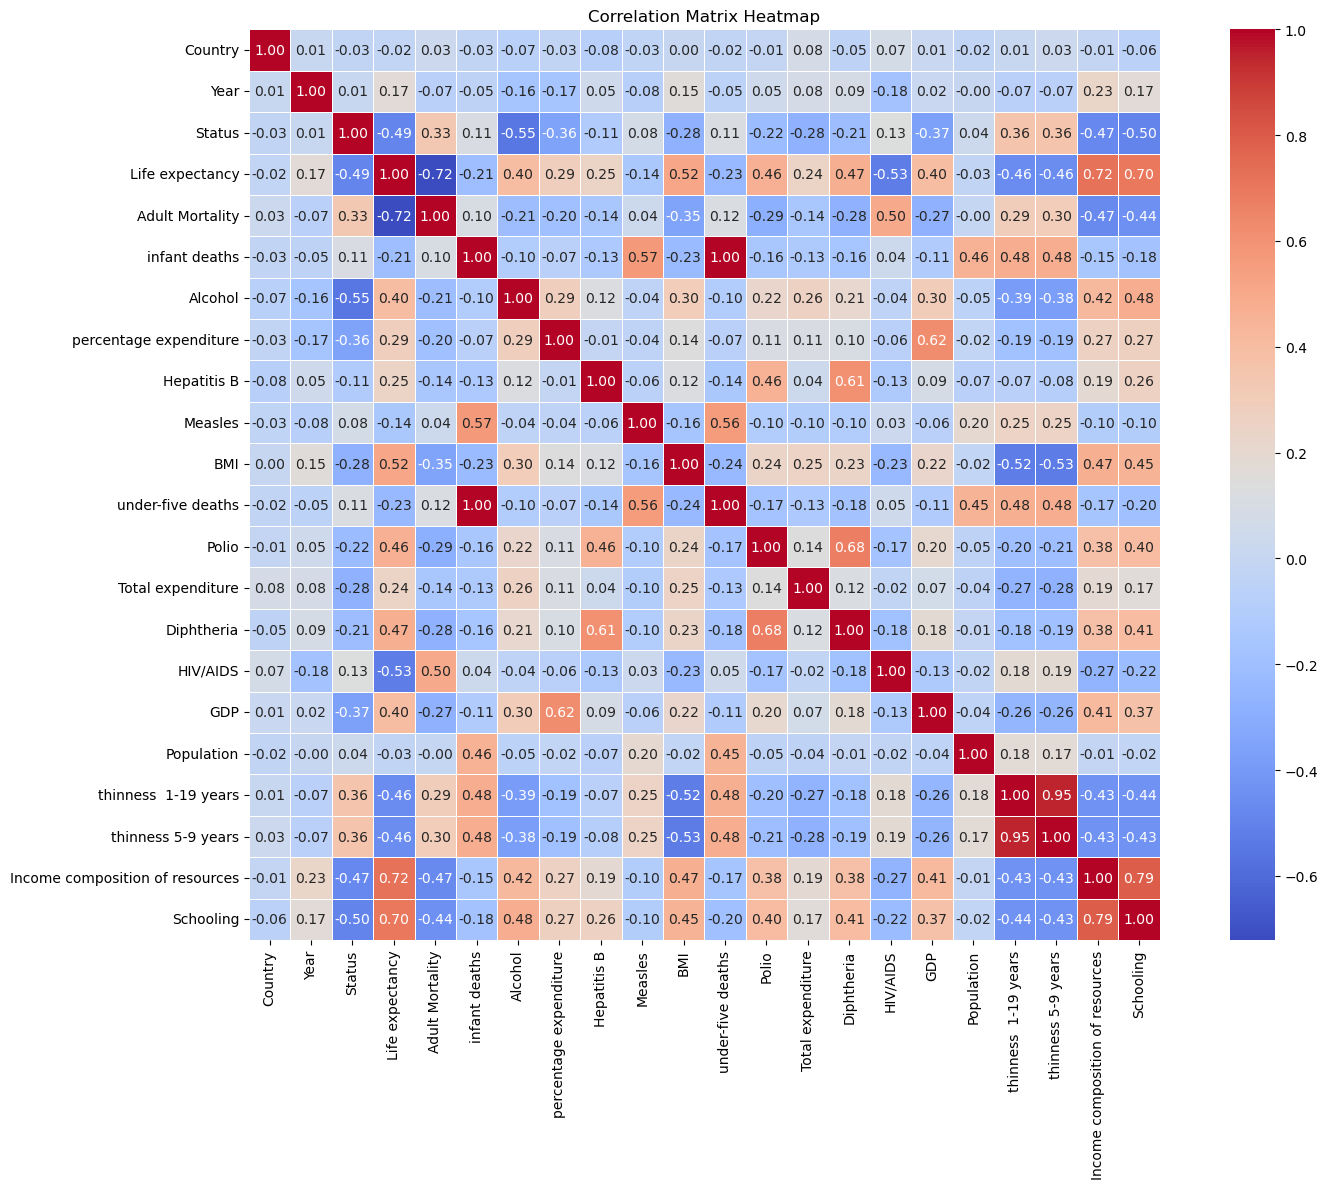

In [4]:
import seaborn as sns

def plot_corr(df):

    corr_matrix = df.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
    plt.title("Correlation Matrix Heatmap")
    plt.tight_layout()
    plt.show()

plot_corr(df)

## Scatter plots of features with good correlation index

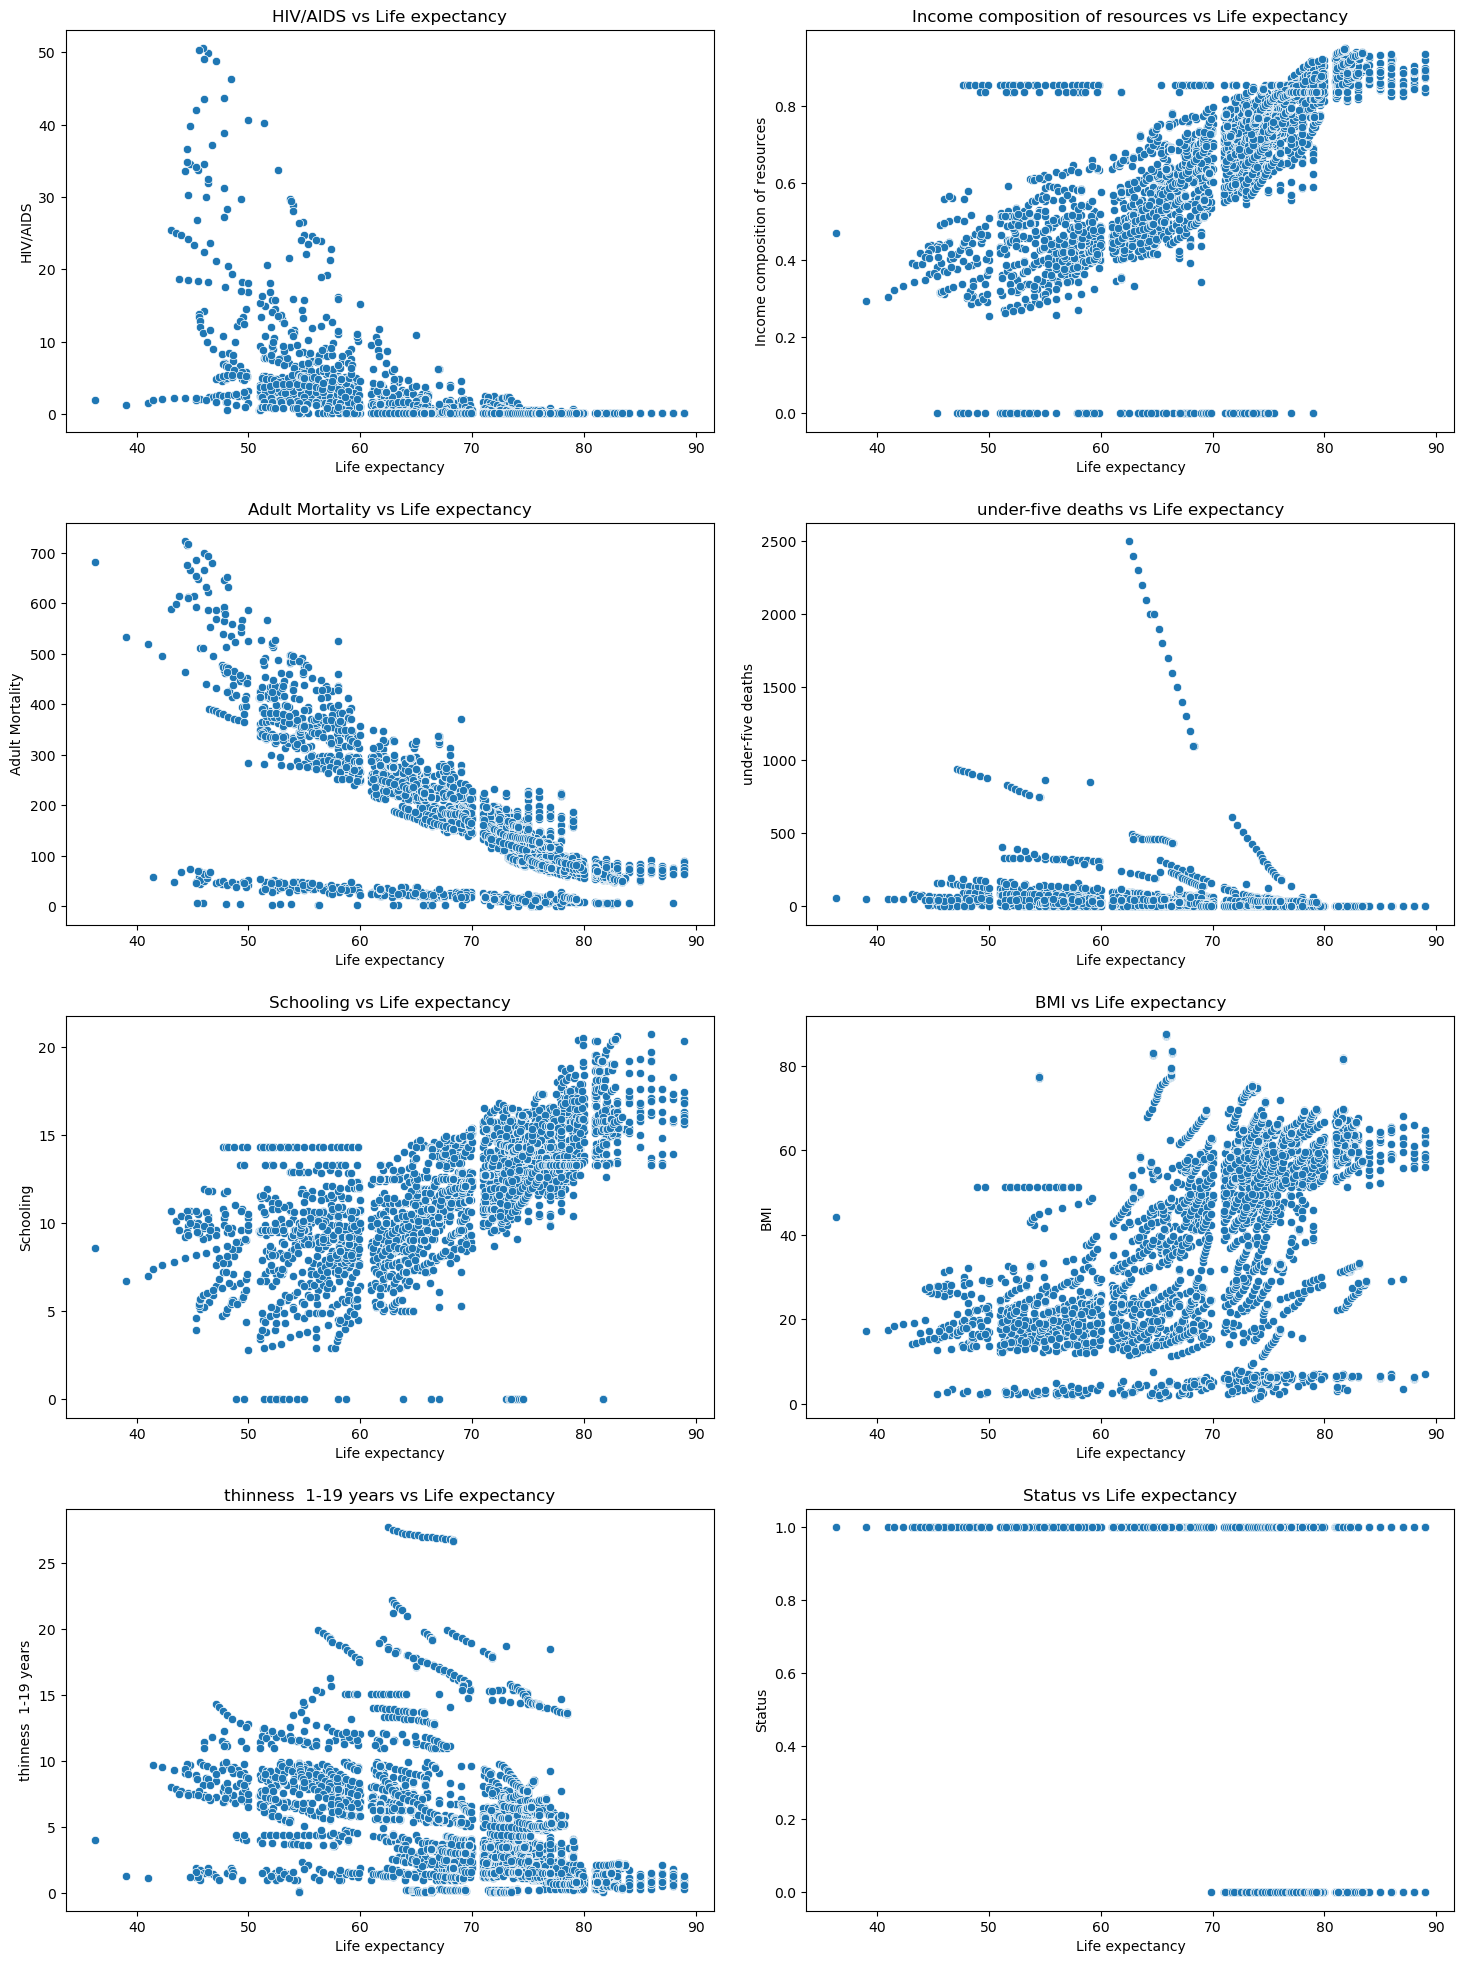

In [5]:
def create_scatterplot(columns, df):

    plt.figure(figsize=(15, 20))

    for index, col in enumerate(columns):
        plt.subplot((len(columns) + 1) // 2, 2, index + 1)

        sns.scatterplot(x = "Life expectancy", y = col, data = df)

        plt.title(f'{col} vs Life expectancy')
        plt.xlabel("Life expectancy")
        plt.ylabel(col)

    plt.tight_layout(pad = 2)

    plt.show()

numerical_columns = ['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling','BMI', 'thinness  1-19 years', 'Status']
create_scatterplot(numerical_columns, df)

## Partitioning the Dataset into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split

train, test =  train_test_split(df, test_size = 0.2, random_state = 42)


## Confirming Absence of Null Values in Training and Testing Data

In [7]:
train.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [8]:
test.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [9]:
from sklearn.preprocessing import MinMaxScaler

x_train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling','BMI', 'thinness  1-19 years', 'Status']]
y_train = train["Life expectancy"]

x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling', 'BMI', 'thinness  1-19 years', 'Status']]
y_test = test["Life expectancy"]


## Normalization

In [10]:
scaler = MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

## Model Training and Evaluation

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
import numpy as np

def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, results_df):
    # initialize your model object
    model = model
    model_name = model.__class__.__name__

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Calculate the score of the model on the training data
    train_score = model.score(x_train, y_train)
    #print(f"Score of the {model_name} model on the training data is: {train_score}")

    # Make predictions on the test data
    predictions = np.round(model.predict(x_test), decimals = 2)

    # See R2 score on the test data
    test_r2_score = r2_score(y_test, predictions)
    #print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")

    mae_score = np.mean(np.abs(y_test - predictions))
    #print(f"MAE score of the {model_name} model on the test data is: {mae_score}")

    rmse_score = np.sqrt(((predictions - y_test) ** 2).mean())

    # Append the model scores to the resutls DataFrame
    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'R2 Score': [test_r2_score], 'MAE': [mae_score], 'RMSE': [rmse_score]})
    results_df = pd.concat([results_df, model_scores], ignore_index=True)
    return results_df

results_df = pd.DataFrame(columns=['Model', 'Training Score', 'R2 Score', 'MAE', 'RMSE'])
results_df = train_and_evaluate_model(LinearRegression(), x_train, y_train, x_test, y_test, results_df)
results_df = train_and_evaluate_model(SVR(C = 9.0, epsilon = 0.9, kernel = 'rbf'), x_train, y_train, x_test, y_test, results_df)
results_df = train_and_evaluate_model(RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5), x_train, y_train, x_test, y_test, results_df)
results_df = train_and_evaluate_model(GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5), x_train, y_train, x_test, y_test, results_df)

print(results_df)


                       Model  Training Score  R2 Score       MAE      RMSE
0           LinearRegression        0.786051  0.787900  3.026174  4.170923
1                        SVR        0.909346  0.911089  1.867232  2.700466
2      RandomForestRegressor        0.967214  0.955362  1.266465  1.913427
3  GradientBoostingRegressor        0.991760  0.973501  0.849353  1.474275


## Feature Importance Scores to Assess the Significance of Features

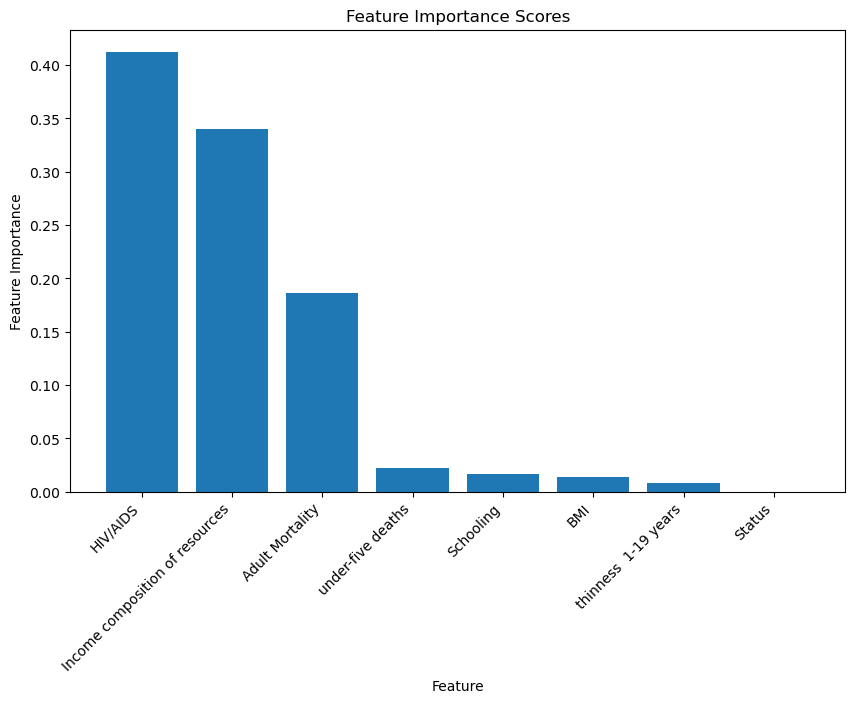

In [12]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor


# Create Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Fit the model to your data
model.fit(x_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_


# Sort and plot feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

sorted_importances = feature_importances[sorted_indices]

sorted_features = ['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling','BMI', 'thinness  1-19 years', 'Status']

# Plotting sorted feature importances

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

## Winsorization

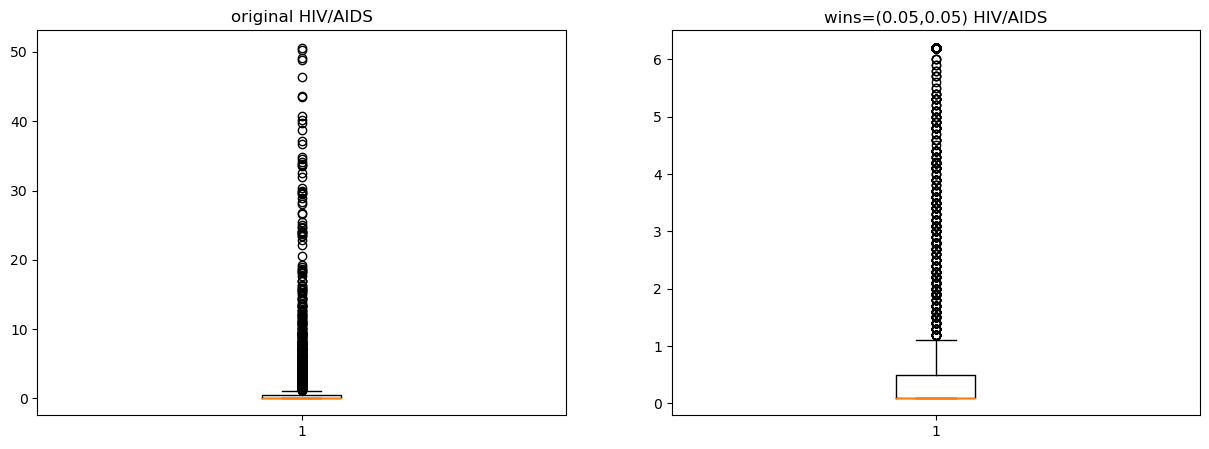

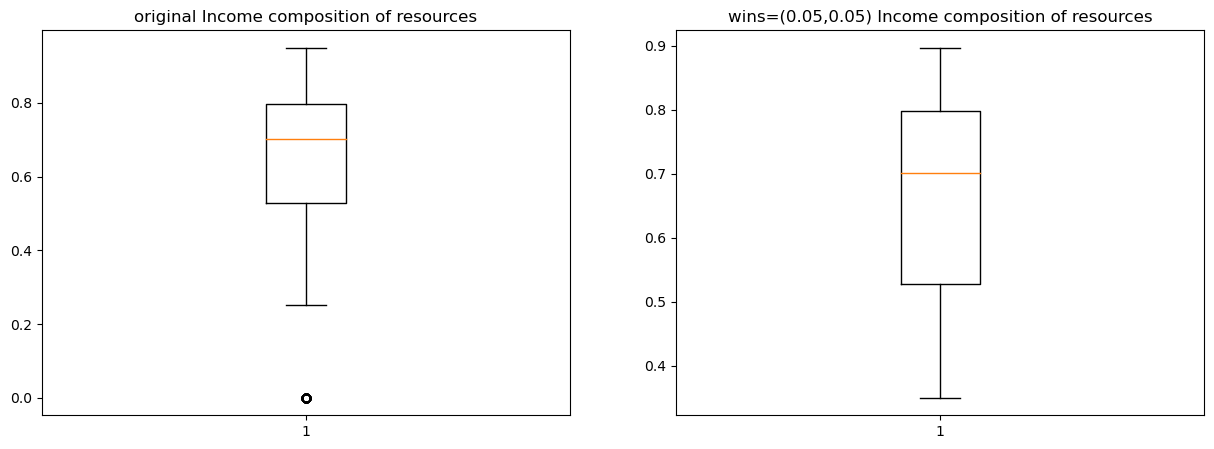

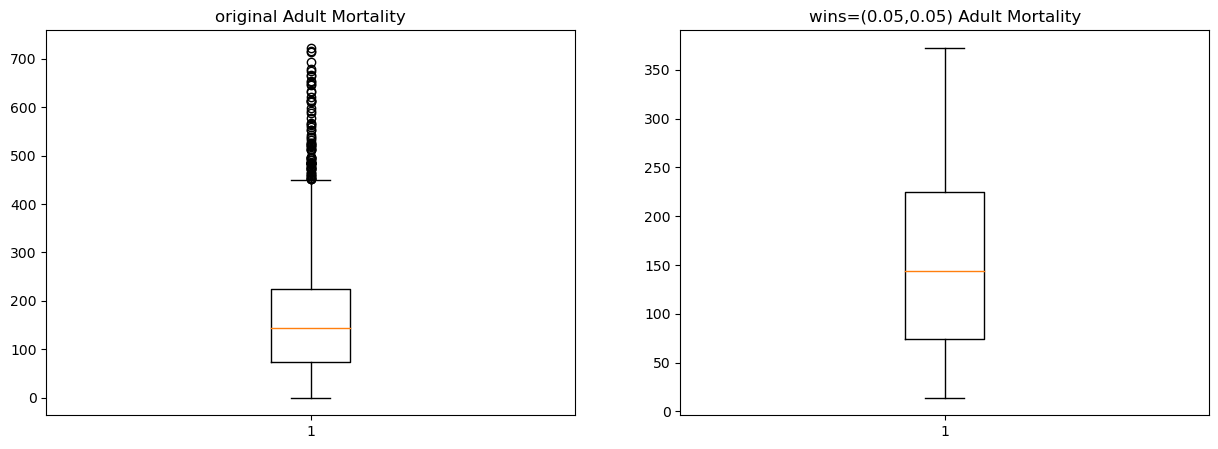

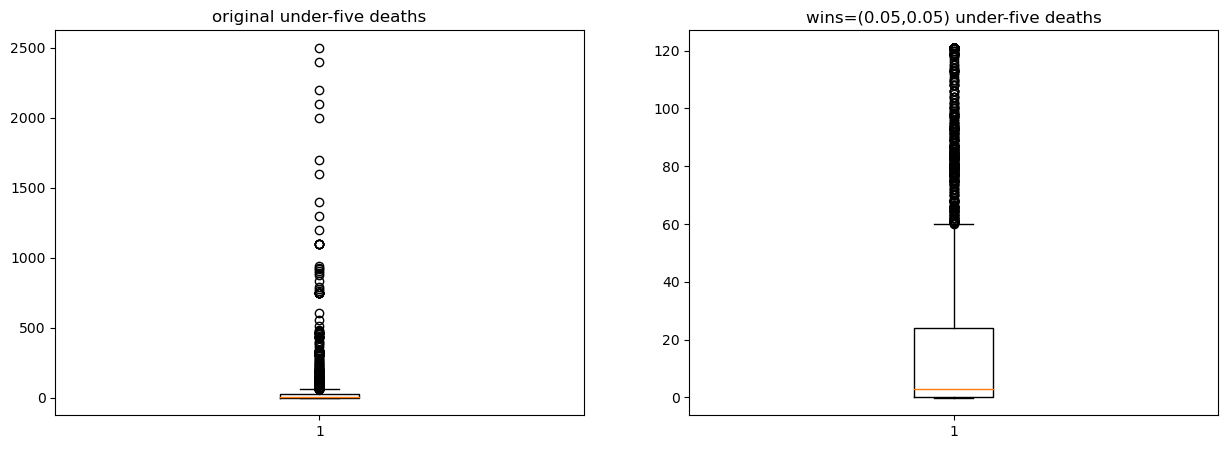

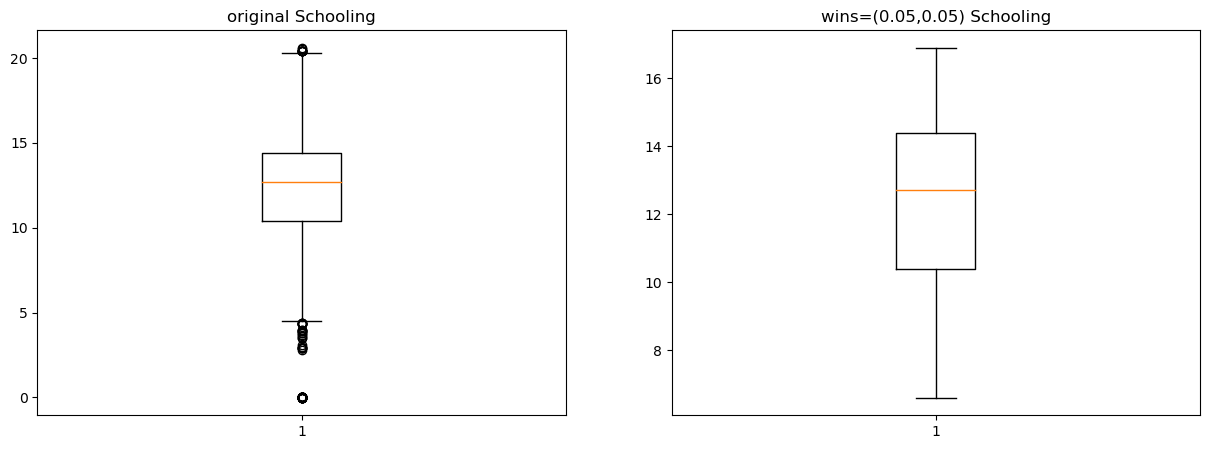

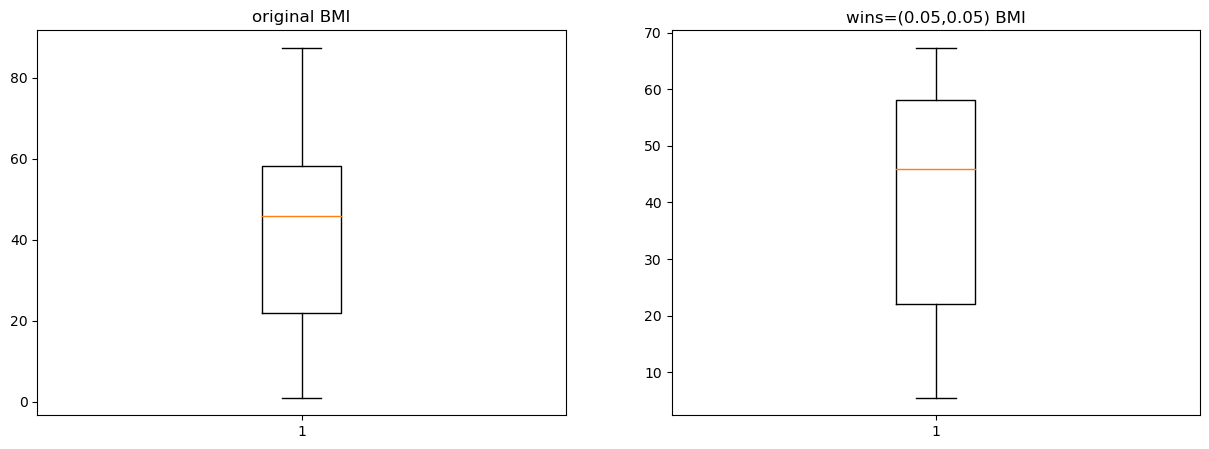

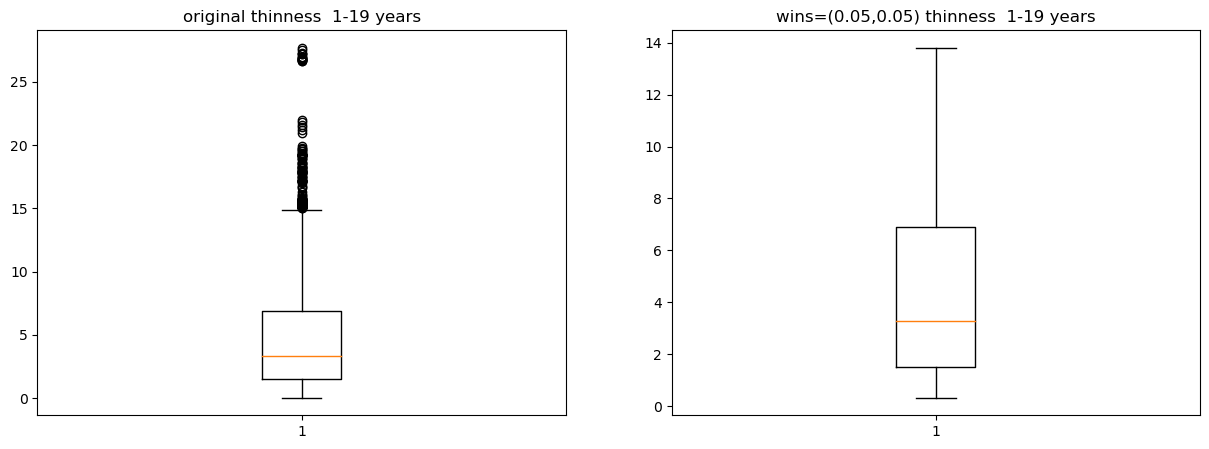

In [13]:
from scipy.stats.mstats import winsorize

if 'Status' in numerical_columns:
    numerical_columns.remove('Status')


def boxlot(numerical_columns, df):
    lower_limit=0.05
    upper_limit=0.05

    for i, col in enumerate(numerical_columns, 1):
        wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()


boxlot(numerical_columns, train)


In [14]:
for column in train.columns:
    winsorized_column = winsorize(train[column], limits=[0.05, 0.05])
    train[column] = winsorized_column

for column in test.columns:
    winsorized_column = winsorize(test[column], limits=[0.05, 0.05])
    test[column] = winsorized_column

## Correlation Matrix Analysis Following Winsorization

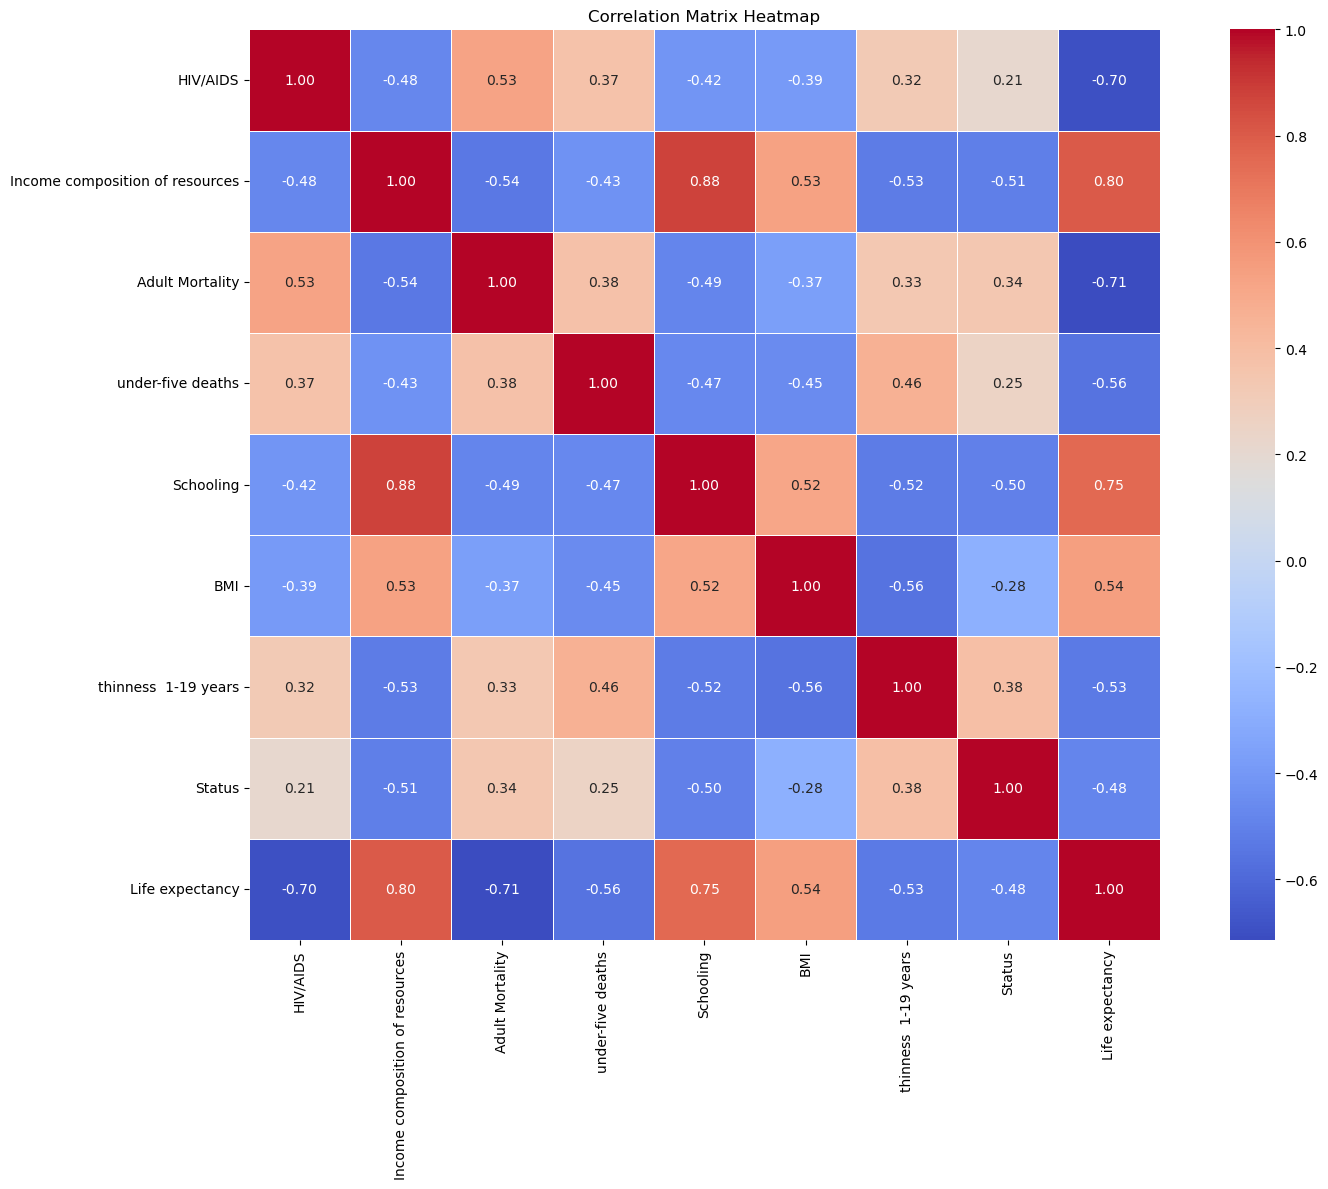

In [15]:
if 'Status' not in numerical_columns:
    numerical_columns.append('Status')

if 'Life expectancy' not in numerical_columns:
    numerical_columns.append('Life expectancy')

corr_df = train[numerical_columns]
plot_corr(corr_df)

In [16]:
x_train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling','BMI', 'thinness  1-19 years', 'Status']]
y_train = train["Life expectancy"]

x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling', 'BMI', 'thinness  1-19 years', 'Status']]
y_test = test["Life expectancy"]

scaler = MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

## Hyperparameter Tuning Using Cross-Validation Techniques

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint


# Define hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

# Initialize RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform random search
random_search.fit(x_train, y_train)

# Get best hyperparameters
best_params = random_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 180}


## Model Training and Evaluation Post-Optimization

In [22]:
results_df = pd.DataFrame(columns=['Model', 'Training Score', 'R2 Score', 'MAE', 'RMSE' ])
results_df = train_and_evaluate_model(LinearRegression(), x_train, y_train, x_test, y_test, results_df)
results_df = train_and_evaluate_model(SVR(C = 10.0, epsilon = 0.9, kernel = 'rbf'), x_train, y_train, x_test, y_test, results_df)
results_df = train_and_evaluate_model(RandomForestRegressor(n_estimators = 289, max_depth=30, min_samples_split=2), x_train, y_train, x_test, y_test, results_df)
results_df = train_and_evaluate_model(GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5), x_train, y_train, x_test, y_test, results_df)

# Create individual models
linear_reg = LinearRegression()
svr = SVR(C = 10.0, epsilon = 0.9, kernel = 'rbf')
random_forest = RandomForestRegressor(n_estimators = 289, max_depth=30, min_samples_split=2)
gradient_boost = GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5)

results_df = train_and_evaluate_model(ensemble_model, x_train, y_train, x_test, y_test, results_df)

print(results_df)

                       Model  Training Score  R2 Score       MAE      RMSE
0           LinearRegression        0.848354  0.851130  2.432690  3.270542
1                        SVR        0.948379  0.946634  1.335461  1.958163
2      RandomForestRegressor        0.997266  0.979435  0.567768  1.215583
3  GradientBoostingRegressor        0.994543  0.976956  0.732089  1.286750
4            VotingRegressor        0.996058  0.978971  0.640038  1.229222
